In [ ]:
# Importación de librerías

import numpy as np #Programación vectorial
import pandas as pd #Estructura y manipulación de datos
import matplotlib.pyplot as plt #Visualización

import seaborn as sb #Visualización
from seaborn import load_dataset
from seaborn import kdeplot
from seaborn import lmplot
from seaborn import boxplot


import warnings #Advertencias
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

data = pd.read_excel("/content/drive/MyDrive/Machine/Base_clientes_Monopoly.xlsx", header=1)

Mounted at /content/drive/


In [ ]:
#Cantidad de filas x cantidad de columnas
print(data.shape)

(51124, 575)


In [ ]:
list(data.columns.values)

['Id',
 'Subsegmento',
 'Sexo',
 'Region',
 'Edad',
 'Renta',
 'Antiguedad',
 'Internauta',
 'Adicional',
 'Dualidad',
 'Monoproducto',
 'Ctacte',
 'Consumo',
 'Hipotecario',
 'Debito',
 'CambioPin',
 'Cuentas',
 'TC',
 'CUPO_L1',
 'CUPO_L2',
 'CUPO_MX',
 'FlgAct_T12',
 'FlgActCN_T12',
 'FlgActCI_T12',
 'FlgActAN_T12',
 'FlgActAI_T12',
 'FlgActPAT_T12',
 'FlgActCCPC_T12',
 'FlgActCCOT_T12',
 'FlgActCOL_T12',
 'Fac_T12',
 'Txs_T12',
 'FacCN_T12',
 'TxsCN_T12',
 'FacCI_T12',
 'TxsCI_T12',
 'FacAN_T12',
 'TxsAN_T12',
 'FacAI_T12',
 'TxsAI_T12',
 'FacPAT_T12',
 'TxsPAT_T12',
 'FacCCPC_T12',
 'TxsCCPC_T12',
 'FacCCOT_T12',
 'TxsCCOT_T12',
 'FacCOL_T12',
 'TxsCOL_T12',
 'FacDebCom_T12',
 'TxsDebCom_T12',
 'FacDebAtm_T12',
 'TxsDebAtm_T12',
 'Col_T12',
 'ColL1T0_T12',
 'ColL1TE_T12',
 'ColL2T0_T12',
 'ColL2AC_T12',
 'ColL2CC_T12',
 'ColMx_T12',
 'PagoNac_T12',
 'PagoInt_T12',
 'EeccNac_T12',
 'EeccInt_T12',
 'UsoL1_T12',
 'UsoL2_T12',
 'UsoLI_T12',
 'IndRev_T12',
 'FlgAct_T11',
 'FlgActCN_T11

In [ ]:
data.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,...,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0,NaN


In [3]:
#Transformacion a Data Frame
df = pd.DataFrame(data)

###**2.4. Medidas de Dispersión**

In [ ]:
#Desviación Estandar
df.std()

Id               14758.371918
Subsegmento         29.276596
Region               3.392703
Edad                13.302573
Renta           409279.460268
                    ...      
UsoL1_T01       289173.134339
UsoL2_T01       432538.882162
UsoLI_T01          113.215624
target               0.286152
Unnamed: 574              NaN
Length: 562, dtype: float64

In [ ]:
#Varianza
df.var()

Id              2.178095e+08
Subsegmento     8.571191e+02
Region          1.151044e+01
Edad            1.769584e+02
Renta           1.675097e+11
                    ...     
UsoL1_T01       8.362110e+10
UsoL2_T01       1.870899e+11
UsoLI_T01       1.281778e+04
target          8.188300e-02
Unnamed: 574             NaN
Length: 562, dtype: float64

In [ ]:
#Correlacion Renta Edad
y = df['Renta']
x = df['Edad']
correlation = y.corr(x)
correlation

0.14300143635287849

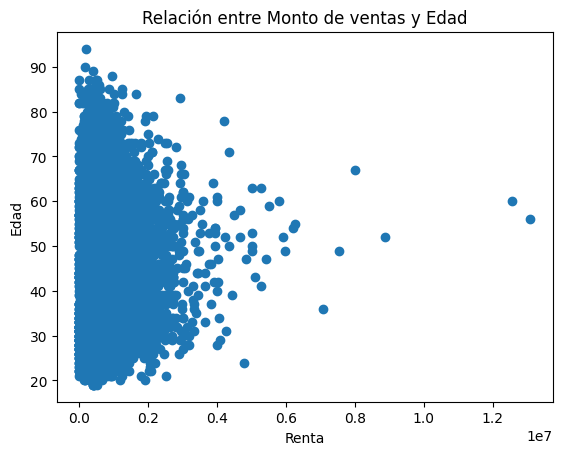

In [ ]:
#Diagrama de Dispersión
fig, ax = plt.subplots()
ax.scatter(df.Renta, df.Edad)

plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

plt.xlabel("Renta")
plt.ylabel("Edad")
plt.title("Relación entre Monto de ventas y Edad")
plt.show()

In [ ]:
#Correlacion Monto facturado por cupo de compra nacional
#y = df['Cupo_L1']
#x = df['Fac_T12']
#correlation = y.corr(x)
#correlation

In [ ]:
# Variables x e y
#x = df['Cupo_L1']  # Cupo de la tarjeta de crédito para compras nacionales
#y = df['Fac_T12']  # Monto facturado por el cliente en TC en el mes X

# Código para el gráfico de dispersión
#plt.title('Correlación Cupo de Compras Nacionales / Monto Facturado')
#plt.scatter(x, y)
#plt.ylabel("Monto Facturado")
#plt.xlabel("Cupo de Compras Nacionales")

# Opcional: Añadir una línea de regresión lineal
#plt.plot(np.unique(x),
 #        np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

#plt.show()

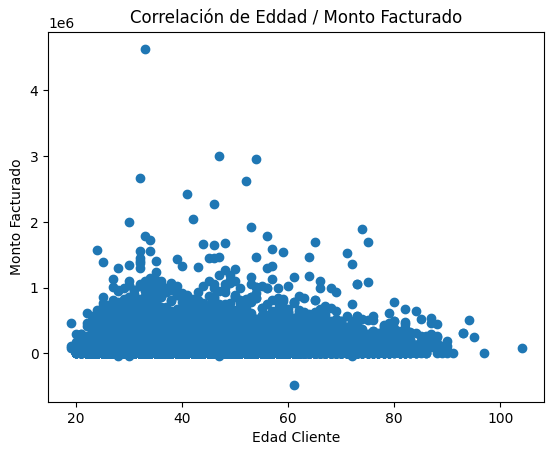

In [ ]:
# Variables x e y
x = df['Edad'] #Edad del cliente.
y = df['Fac_T12'] # Monto facturado por el cliente en la tarjeta de crédito en un mes específico.

# Código para el gráfico de dispersión
plt.title('Relación de Eddad / Monto Facturado')
plt.scatter(x, y)
plt.ylabel("Monto Facturado")
plt.xlabel("Edad Cliente")

# Opcional: Añadir una línea de regresión lineal
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.show()

In [ ]:
#Correlacion factura ceredito Edad
y = df['Renta']
x = df['Fac_T12']
correlation = y.corr(x)
correlation

0.10499700589341251

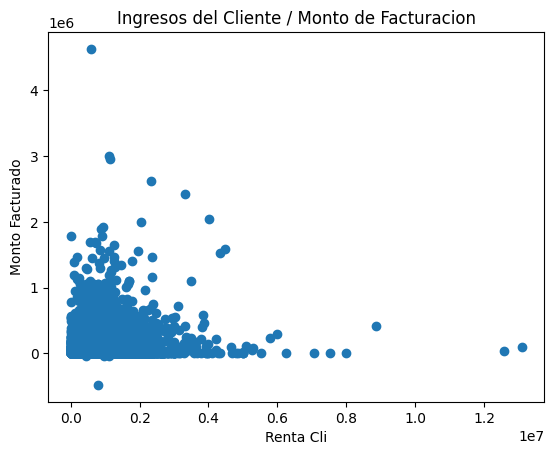

In [ ]:
# Variables x e y
x = df['Renta']  #Ingreso del cliente.
y = df['Fac_T12'] #Monto facturado por el cliente en la tarjeta de crédito en un mes específico.

# Código para el gráfico de dispersión
plt.title('Ingresos del Cliente / Monto de Facturacion')
plt.scatter(x, y)
plt.ylabel("Monto Facturado")
plt.xlabel("Renta Cli")

plt.show()

    Variable Antiguedad: Antigüedad del cliente en meses.
    Variable Fac_T12: Monto facturado por el cliente en la tarjeta de crédito en un mes específico.

In [ ]:
#Correlacion Antiguedad facturación
y = df['Antiguedad']
x = df['Fac_T12']
correlation = y.corr(x)
correlation

0.10890184400304155

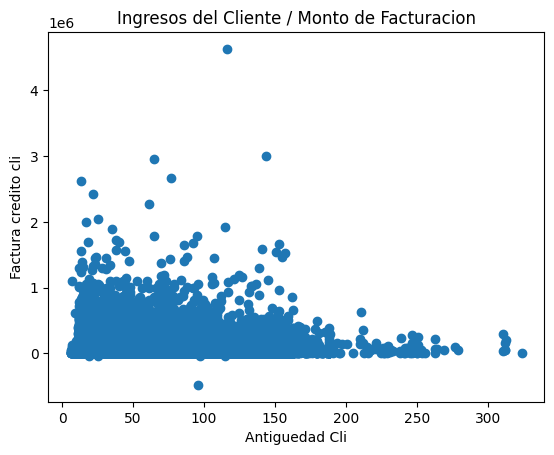

In [ ]:
# Variables x e y
x = df['Antiguedad']  #Antiguedad del cliente.
y = df['Fac_T12'] #Monto de facturación del cliente en tarjetas de credito.

# Código para el gráfico de dispersión
plt.title('Ingresos del Cliente / Monto de Facturacion')
plt.scatter(x, y)
plt.ylabel("Factura credito cli")
plt.xlabel("Antiguedad Cli")

# Opcional: Añadir una línea de regresión lineal
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')

plt.show()

In [ ]:
#Correlación
#Correlacion Cupo de credito internacional y nacional
y = df['Cupo_MX']
x = df['Cupo_l1']
correlation = y.corr(x)
correlation

0.10890184400304155

    Variable CUPO_MX: Cupo de la tarjeta de crédito para compras internacionales.
    Variable CUPO_L1: Cupo de la tarjeta de crédito para compras nacionales.

TypeError: ignored

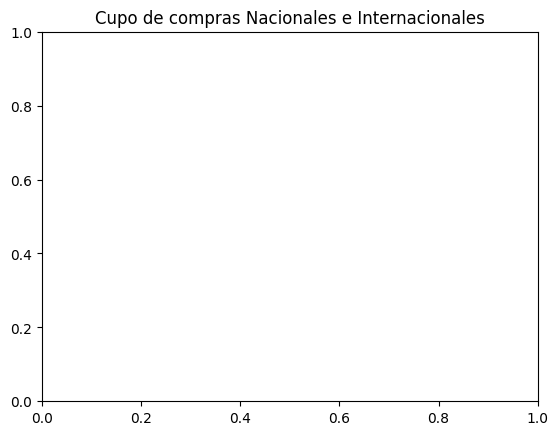

In [ ]:
# Variables x e y
x = df['CUPO_MX'] # Cupo de compras Internacionales
y = df['CUPO_L1'] #Cupo de compras Nacionales

#Codigo grafico de dispersión
plt.title('Cupo de compras Nacionales e Internacionales')
plt.scatter ('x,y')
plt.ylabel('Cupo compra nacional')
plt.xlabel('Cupo compra inter')

plt.show()



In [ ]:
corr = df.corr()
plt.figure(figsize=(51000,600))
sb.heatmap(corr, cmap="coolwarm",annot=True)
plt.show()

ValueError: ignored

Error in callback <function _draw_all_if_interactive at 0x7b5455f05b40> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 5.1e+06x60000 with 2 Axes>

In [ ]:
Monopoly = sb.load_dataset("Base_clientes_Monopoly")
sb.pairplot(Monopoly)

ValueError: ignored

In [ ]:
plt.scatter(df_no_outliers['variable1'], df_no_outliers['variable2'])
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Comportamiento de Variables sin Outliers')
plt.show()

NameError: ignored

In [ ]:
conteo_negativos = (df['UsoL1_T12'] < 0).sum()

print('Cantidad de datos negativos en UsoL1_T12:', conteo_negativos)

Cantidad de datos negativos en UsoL1_T12: 811


In [ ]:

df['UsoL1_T12_abs'] = df['UsoL1_T12'].abs()

# Mostrar el DataFrame con el valor absoluto calculado
print(df)

          Id  Subsegmento Sexo  Region  Edad     Renta  Antiguedad  \
0          1          160    M    13.0    43       NaN         130   
1          2          160    H    13.0    46  143640.0          69   
2          3          170    H    13.0    45  929106.0          24   
3          4          151    H    13.0    46  172447.0         134   
4          5          170    H    13.0    46  805250.0         116   
...      ...          ...  ...     ...   ...       ...         ...   
51119  51120          160    H    13.0    51  364978.0          57   
51120  51121          170    H    13.0    51  625376.0          39   
51121  51122          160    H    13.0    47  806220.0         153   
51122  51123          160    M    13.0    47       NaN          11   
51123  51124          170    H    13.0    51  840878.0          75   

       Internauta  Adicional  Dualidad  ...  PagoInt_T01  EeccNac_T01  \
0               1          1         0  ...          0.0    1099866.0   
1            

In [ ]:
print(df.head(10))  # Mostrar las primeras 10 filas

# Configurar el formato de visualización
pd.set_option('display.float_format', '{:.2f}'.format)

# Mostrar el DataFrame formateado
print(df.to_string())

   Id  Subsegmento Sexo  Region  Edad      Renta  Antiguedad  Internauta  \
0   1          160    M    13.0    43        NaN         130           1   
1   2          160    H    13.0    46   143640.0          69           1   
2   3          170    H    13.0    45   929106.0          24           1   
3   4          151    H    13.0    46   172447.0         134           0   
4   5          170    H    13.0    46   805250.0         116           0   
5   6          170    H    13.0    47   707664.0          67           1   
6   7          811    H    13.0    48  1022833.0          21           1   
7   8          170    H    13.0    46        NaN          69           0   
8   9          170    H    13.0    49  1171066.0          33           0   
9  10          170    M    13.0    44   964387.0          23           1   

   Adicional  Dualidad  ...  PagoInt_T01  EeccNac_T01  EeccInt_T01  UsoL1_T01  \
0          1         0  ...          0.0    1099866.0          0.0  1099866.0   
1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
print(data.shape)

(51124, 575)


In [11]:
print(df.info)

<bound method DataFrame.info of           Id  Subsegmento Sexo  Region  Edad     Renta  Antiguedad  \
0          1          160    M    13.0    43       NaN         130   
1          2          160    H    13.0    46  143640.0          69   
2          3          170    H    13.0    45  929106.0          24   
3          4          151    H    13.0    46  172447.0         134   
4          5          170    H    13.0    46  805250.0         116   
...      ...          ...  ...     ...   ...       ...         ...   
51119  51120          160    H    13.0    51  364978.0          57   
51120  51121          170    H    13.0    51  625376.0          39   
51121  51122          160    H    13.0    47  806220.0         153   
51122  51123          160    M    13.0    47       NaN          11   
51123  51124          170    H    13.0    51  840878.0          75   

       Internauta  Adicional  Dualidad  ...  PagoNac_T01  PagoInt_T01  \
0               1          1         0  ...        330

In [12]:
# Verificar el tipo de datos actual de 'TimeAlive'
print(df['UsoL1_T01'].dtype)

float64


In [13]:
# Verificar el tipo de datos actual de 'TimeAlive'
print(df['UsoL2_T01'].dtype)

int64


In [ ]:
# Verificar el tipo de datos actual de 'TimeAlive'
print(df['UsoL2_T01'].dtype)

In [19]:
print(df[['UsoL1_T12', 'UsoL2_T01']])

       UsoL1_T12  UsoL2_T01
0       731768.0      15080
1       244876.0      83596
2        94415.0          0
3       358807.0      10591
4        67516.0     377782
...          ...        ...
51119   549787.0      12668
51120        0.0     572363
51121   103545.0      16241
51122        NaN      84982
51123    73300.0          0

[51124 rows x 2 columns]


In [22]:
valores_negativos = df[(df['UsoL1_T01'] < 0) | (df['UsoL2_T01'] < 0)][['UsoL1_T01', 'UsoL2_T01']]
print(valores_negativos)

       UsoL1_T01  UsoL2_T01
24     -32229.88      87286
40    -117612.00          0
133    -13420.00          0
156    -20985.54     294068
162   -125446.00     305723
...          ...        ...
50933    -597.00      77436
50950 -116159.00     105484
50961 -188519.00     900005
51014   -9154.00      94090
51095    -957.00      76300

[1427 rows x 2 columns]


In [27]:
valores_negativos = df[df['UsoL1_T01'] < 0]
print(valores_negativos)

          Id  Subsegmento Sexo  Region  Edad     Renta  Antiguedad  \
24        25          160    H     7.0    50  572431.0          63   
40        41          170    M    13.0    49  860000.0          60   
133      134          160    H     4.0    50  308589.0           7   
156      157          160    H    13.0    48  477503.0          27   
162      163          160    H     9.0    42  374871.0          15   
...      ...          ...  ...     ...   ...       ...         ...   
50933  50934          170    H    13.0    50  659000.0          70   
50950  50951          160    M     9.0    49  494972.0          50   
50961  50962          170    M    12.0    51  930049.0          26   
51014  51015          151    H    12.0    50       NaN          84   
51095  51096          160    H    13.0    46  326689.0          14   

       Internauta  Adicional  Dualidad  ...  PagoNac_T01  PagoInt_T01  \
24              1          0         1  ...        74000          0.0   
40           

In [37]:
df['UsoL1_T01'] = df['UsoL1_T01'].abs()

print("DataFrame con valores negativos transformados a positivos:")
print(df['UsoL1_T01'])

DataFrame con valores negativos transformados a positivos:
0        1099866.0
1         214592.0
2           7400.0
3         272762.0
4          75339.0
           ...    
51119     478320.0
51120          0.0
51121       9652.0
51122      24638.0
51123      18500.0
Name: UsoL1_T01, Length: 51124, dtype: float64


In [40]:
df[df['UsoL1_T01'] > 0]
print(valores_negativos)

       UsoL1_T01  UsoL2_T01
0      1099866.0      15080
1       214592.0      83596
2         7400.0          0
3       272762.0      10591
4        75339.0     377782
...          ...        ...
51119   478320.0      12668
51120        0.0     572363
51121     9652.0      16241
51122    24638.0      84982
51123    18500.0          0

[48171 rows x 2 columns]


In [33]:
valores_negativos = df[(df['UsoL1_T01'] > 0) | (df['UsoL2_T01'] > 0)][['UsoL1_T01', 'UsoL2_T01']]
print(valores_negativos)

       UsoL1_T01  UsoL2_T01
0      1099866.0      15080
1       214592.0      83596
2         7400.0          0
3       272762.0      10591
4        75339.0     377782
...          ...        ...
51119   478320.0      12668
51120        0.0     572363
51121     9652.0      16241
51122    24638.0      84982
51123    18500.0          0

[48171 rows x 2 columns]


In [42]:
filter = df.min() < 0
df.min()[filter]

TypeError: ignored

In [46]:
filter = df.min() < 0
df[filter.index.to_list()]

TypeError: ignored

In [50]:
#Agrupar las variables a con valores negativos
columns_to_transform = ['Fac_avg', 'FacCN_avg', 'EeccNac_avg', 'UsoL1_avg', 'UsoL2_avg', 'UsoLI_avg']

for col in columns_to_transform:
    df[col] = df[col].abs()
#tranformar las variables
print("Variables transformadas a valor absoluto:")
print(df[columns_to_transform])

KeyError: ignored

In [51]:
valores_negativos = df[df['Fac_avg'] < 0]
print(valores_negativos)

KeyError: ignored

In [52]:
print(df['Fac_avg'])

KeyError: ignored